In [1]:
pip install pandas numpy matplotlib seaborn textblob nltk snscrape

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.8/74.8 kB 1.8 MB/s eta 0:00:00


In [3]:
import certifi
import ssl
ssl_context = ssl.create_default_context(cafile=certifi.where())

In [5]:
!pip install certifi --upgrade

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/tmp/ipython-input-7-2780009217.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='TrueSentiment', palette='pastel')


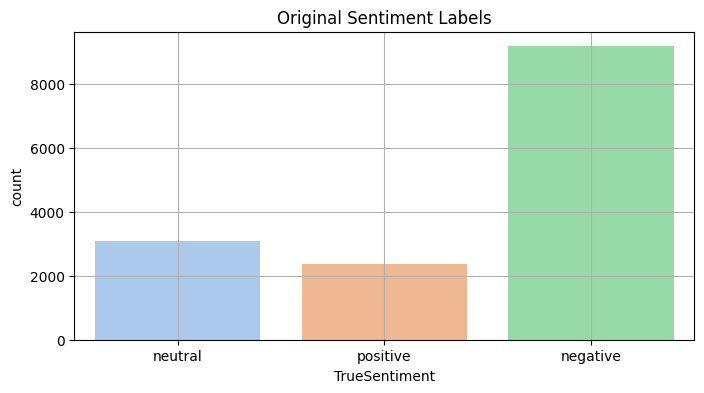

/tmp/ipython-input-7-2780009217.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='PredictedSentiment', palette='Set2')


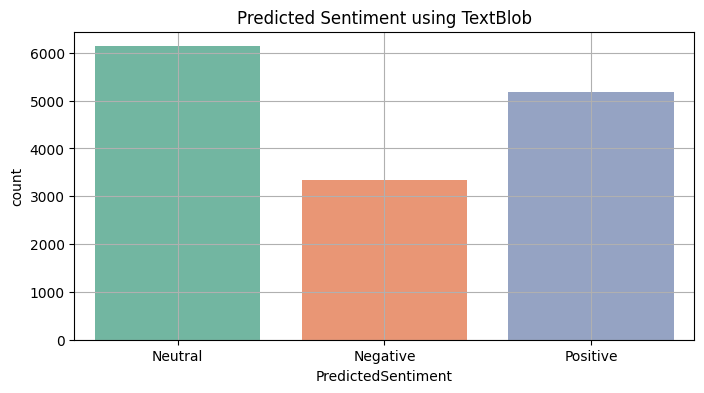

                                                  Tweet TrueSentiment  \
5736  @SouthwestAir that's bull. Once you add a fare...      negative   
4224  @united I don't need to make any changes. I re...      negative   
5577  @SouthwestAir Yes, but I like need my luggage ...      negative   
5491  @SouthwestAir not frustrated, just an idea! Gr...      positive   
8135  @JetBlue Spent most of the winter in NNY with ...       neutral   

     PredictedSentiment  
5736            Neutral  
4224            Neutral  
5577            Neutral  
5491           Positive  
8135           Positive  


In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
import nltk
nltk.download('punkt')

# Load the offline dataset (download from Kaggle and upload if using Colab)
df = pd.read_csv('/content/Tweets.csv')  # Change path as per your file location

# Keep only the relevant columns
df = df[['text', 'airline_sentiment']].rename(columns={'text': 'Tweet', 'airline_sentiment': 'TrueSentiment'})

# Optional: Predict sentiment using TextBlob
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0.05:
        return "Positive"
    elif polarity < -0.05:
        return "Negative"
    else:
        return "Neutral"

df['PredictedSentiment'] = df['Tweet'].apply(get_sentiment)

# Plot actual sentiment distribution
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='TrueSentiment', palette='pastel')
plt.title("Original Sentiment Labels")
plt.grid(True)
plt.show()

# Plot predicted sentiment distribution
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='PredictedSentiment', palette='Set2')
plt.title("Predicted Sentiment using TextBlob")
plt.grid(True)
plt.show()

# Show a few sample tweets with predicted sentiment
print(df[['Tweet', 'TrueSentiment', 'PredictedSentiment']].sample(5))
